# Finding Heavy Traffic Indicators on I-94

dataset
- westbound traffic on the I-94 interstate highway

project goal
- determine a few indicators of heavy traffic
- e.g., weather type, time of day, time of week

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

## 1. The I-94 Traffic Dataset

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic[:5]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic[-5:]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Observations
- `temp` units? min=0, max=310, mean=281
- `rain_1h` units? max=9,831 inches? ≈819 feet?
- `date_time` in dt format, but dtype=object

- 9 columns
- ~48,200 entries
- 1 column with most data missing:`holiday`
- 5 cols numeric (float/int)
- 4 cols object

## 2. analyzing traffic volume

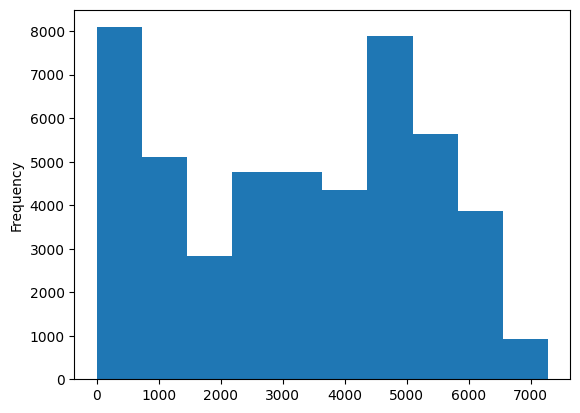

In [7]:
#  traffic volume distribution

traffic['traffic_volume'].plot.hist()
plt.show()

In [8]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Observations
- min=0? perhaps no traffic volume on a particular stretch of I-94
- max=7280 
- 25% = 1193
- 75% = 4933

## 3. traffic volume: day vs. night

In [9]:
# divide dataset in two parts: (1) daytime–7am-7pm, (2) nightime-7pm-7am

traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'][:5]

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [10]:
date_time_series = traffic['date_time'].dt.hour
date_time_series[:10]

0     9
1    10
2    11
3    12
4    13
5    14
6    15
7    16
8    17
9    18
Name: date_time, dtype: int32

In [11]:
day = traffic.copy()[(traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour <19)]
day.shape
# day[:5]
# day.describe()

(23877, 9)

In [12]:
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
night.shape
# nightime[:5]
# nightime.describe()

(24327, 9)

## 4. traffic volume: day vs. night (part 2)